In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, 
                                                            postgres_host, postgres_port, postgres_db))
data = pd.read_sql_query('select * from heartdisease', con=engine)
engine.dispose()

In [5]:
X = data.iloc[:, :13]
y = data.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)

x_half1, x_half2, x_pca_half1, x_pca_half2 = train_test_split(X, X_pca, test_size=0.5, random_state=123)


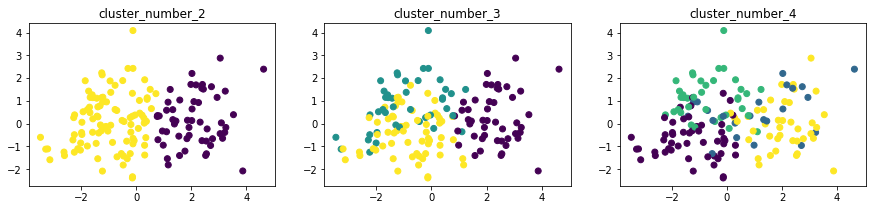

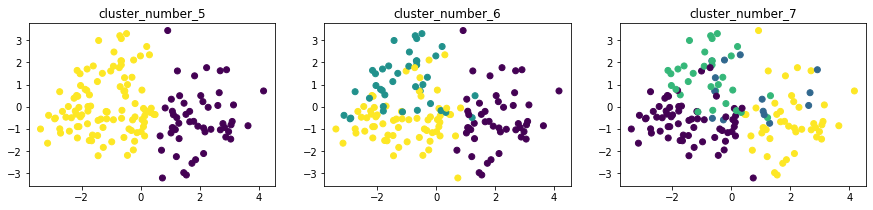

In [59]:
# for i, data in enumerate([(x_half1, x_pca_half1), (x_half2, x_pca_half2)]):
plt.figure(figsize=(15,3))
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(x_half1)
    pred = kmeans.predict(x_half1)
    plt.subplot(1,3,k-1)
    plt.scatter(x_pca_half1[:,0], x_pca_half1[:,1],  c=pred)
    plt.title('cluster_number_{}'.format(k))

plt.figure(figsize=(15,3))
for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(x_half1)
    pred = kmeans.predict(x_half2)
    plt.subplot(1,3,k-1)
    plt.scatter(x_pca_half2[:,0], x_pca_half2[:,1],  c=pred)
    plt.title('cluster_number_{}'.format(k+3))

In [106]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X)

print('ARI for 2 clusters, {}'.format(metrics.adjusted_rand_score(y, pred_2)))
print('ARI for 3 clusters, {}'.format(metrics.adjusted_rand_score(y, pred_3)))
print('ARI for 4 clusters, {}'.format(metrics.adjusted_rand_score(y, pred_4)))

print('silhouette for 2 clusters, {}'.format(metrics.silhouette_score(X, pred_2, metric='euclidean')))
print('silhouette for 3 clusters, {}'.format(metrics.silhouette_score(X, pred_3, metric='euclidean')))
print('silhouette for 4 clusters, {}'.format(metrics.silhouette_score(X, pred_4, metric='euclidean')))

ARI for 2 clusters, 0.4380857727169879
ARI for 3 clusters, 0.2740064669723646
ARI for 4 clusters, 0.1915231366832196
silhouette for 2 clusters, 0.17530682286260937
silhouette for 3 clusters, 0.12990610551129156
silhouette for 4 clusters, 0.13347392846804823
